In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.18.5
1.0.5
3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
0.23.1


In [3]:
df = pd.read_csv("..//resources//csv//data//biometrics.csv")

In [4]:
df.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
0,2020-10-25 19:00:47,84.9,707,0.10,0.91,0,0,0.0,0.0,0.0,0.0
1,2020-10-25 19:00:49,83.6,718,12.71,0.91,0,0,0.0,0.0,0.0,0.0
2,2020-10-25 19:00:49,80.9,742,0.00,0.91,0,0,0.0,0.0,0.0,0.0
3,2020-10-25 19:00:50,83.0,723,0.00,0.91,0,0,0.0,0.0,0.0,0.0
4,2020-10-25 19:00:51,83.8,716,0.00,0.90,0,0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,75.948762,794.407121,7.730480,1.001780,0.013932,0.126935,2.921103,2.517510,1.120223,0.804458
std,5.711617,59.714540,3.937004,0.078368,0.117299,0.333158,2.978730,2.876539,1.094584,0.804154
min,60.600000,650.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.925000,756.000000,4.752500,0.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.850000,791.500000,6.880000,1.020000,0.000000,0.000000,3.394231,1.958333,1.708267,1.039204
75%,79.400000,833.750000,10.082500,1.050000,0.000000,0.000000,6.153846,4.333333,2.100779,1.540000
max,92.300000,990.000000,19.570000,1.180000,1.000000,1.000000,7.461538,8.100000,2.850000,2.380000


In [6]:
#sns.pairplot(df, height=4, aspect=1);

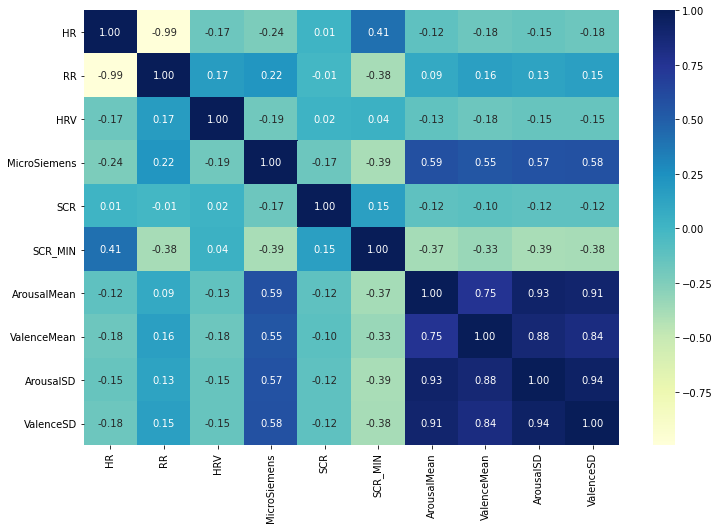

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [8]:
# Filter outliers (arousal - valence = 0)
filter = df['ArousalMean'] > 0
filtered = df[filter]
filtered.head()

,TimeStamp,HR,RR,HRV,MicroSiemens,SCR,SCR_MIN,ArousalMean,ValenceMean,ArousalSD,ValenceSD
226,2020-10-25 19:03:44,75.9,790,4.83,1.11,0,0,6.07,7.63,2.31,1.41
227,2020-10-25 19:03:44,77.2,777,3.77,1.10,0,0,6.07,7.63,2.31,1.41
228,2020-10-25 19:03:45,77.0,779,3.21,1.10,0,0,6.07,7.63,2.31,1.41
229,2020-10-25 19:03:46,77.0,779,3.08,1.09,0,0,7.31,7.21,1.64,2.26
230,2020-10-25 19:03:46,77.4,775,3.20,1.09,0,0,7.31,7.21,1.64,2.26


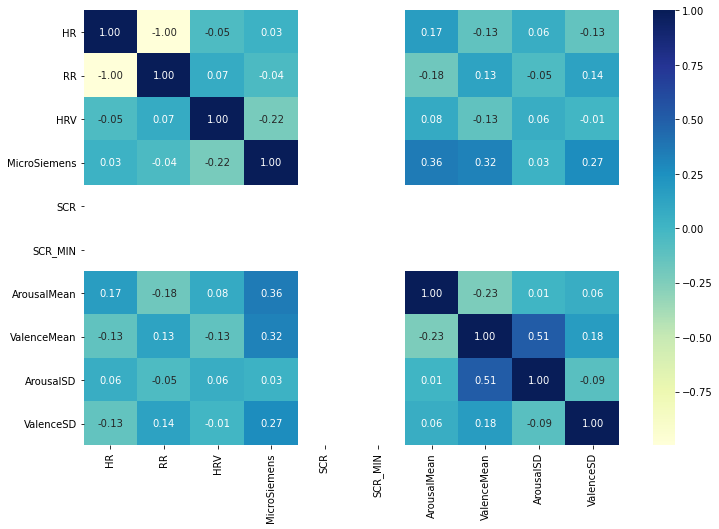

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(filtered.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [10]:
X = filtered[['MicroSiemens', 'HR', 'RR', 'HRV', ]].values
y = filtered['ArousalMean'].values
X

array([[  1.11,  75.9 , 790.  ,   4.83],
       [  1.1 ,  77.2 , 777.  ,   3.77],
       [  1.1 ,  77.  , 779.  ,   3.21],
       ...,
       [  0.97,  70.4 , 852.  ,  17.42],
       [  0.96,  67.  , 895.  ,  17.38],
       [  0.95,  65.9 , 910.  ,  17.16]])

In [11]:
X[0]

array([  1.11,  75.9 , 790.  ,   4.83])

In [12]:
y

array([6.07    , 6.07    , 6.07    , 7.31    , 7.31    , 7.31    ,
       6.68    , 6.68    , 6.14    , 6.14    , 6.14    , 6.61    ,
       6.61    , 6.73    , 6.73    , 6.73    , 6.35    , 6.35    ,
       6.35    , 6.28    , 6.28    , 6.84    , 6.84    , 6.84    ,
       7.27    , 7.27    , 3.788461, 3.788461, 3.788461, 3.788461,
       3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
       3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
       3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
       3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
       3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
       3.788461, 4.5     , 4.5     , 4.5     , 4.5     , 4.5     ,
       4.5     , 4.5     , 4.5     , 4.5     , 4.5     , 4.5     ,
       4.5     , 4.692307, 4.692307, 4.692307, 4.692307, 4.692307,
       4.692307, 4.692307, 4.692307, 4.692307, 4.692307, 4.692307,
       4.692307, 4.692307, 3.711539, 3.711539, 3.711539, 3.711

# Split data set into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

y_train, y_test

(array([6.07    , 6.07    , 6.07    , 7.31    , 7.31    , 7.31    ,
        6.68    , 6.68    , 6.14    , 6.14    , 6.14    , 6.61    ,
        6.61    , 6.73    , 6.73    , 6.73    , 6.35    , 6.35    ,
        6.35    , 6.28    , 6.28    , 6.84    , 6.84    , 6.84    ,
        7.27    , 7.27    , 3.788461, 3.788461, 3.788461, 3.788461,
        3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
        3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
        3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
        3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
        3.788461, 3.788461, 3.788461, 3.788461, 3.788461, 3.788461,
        3.788461, 4.5     , 4.5     , 4.5     , 4.5     , 4.5     ,
        4.5     , 4.5     , 4.5     , 4.5     , 4.5     , 4.5     ,
        4.5     , 4.692307, 4.692307, 4.692307, 4.692307, 4.692307,
        4.692307, 4.692307, 4.692307, 4.692307, 4.692307, 4.692307,
        4.692307, 4.692307, 3.711539, 3.711539, 

In [15]:
# Para poder usar un clasificador, los datos de la variable target deben ser discretos.
#Los convertimos a True-False (Aroused-NotAroused) con el fin de poder entrear un clasificador binario
y_train_aroused = (y_train > 5)

In [16]:
y_train_aroused

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,

# SGDClassifier
[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) Linear classifiers (SVM, logistic regression) with SGD training.

# Training

In [17]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_aroused)

SGDClassifier(random_state=0)

# Prediction

In [18]:
clf.predict(X[145].reshape(1, -1))

array([ True])

# Performance Measuring

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(clf, X_train, y_train_aroused, cv=3, scoring='accuracy')

array([0.53333333, 0.53932584, 0.46067416])

# Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
y_train_pred = cross_val_predict(clf, X_train, y_train_aroused, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_aroused, y_train_pred)

array([[41, 83],
       [48, 96]])

In [25]:
pd.DataFrame(confusion_matrix(y_train_aroused, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative         41       83
       Positive         48       96

In [26]:
from sklearn.metrics import precision_score, recall_score

In [27]:
precision_score(y_train_aroused, y_train_pred)

0.5363128491620112

# Clustering

## KMeans

In [28]:
# 'MicroSiemens', 'HR', 'RR', 'HRV'

In [29]:
from sklearn.cluster import KMeans

In [30]:
ms_hrv = X_train[:, [0, 1]]

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(ms_hrv)

KMeans(n_clusters=3)

In [32]:
y_kmeans = kmeans.predict(ms_hrv)
y_kmeans

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 0], dtype=int32)

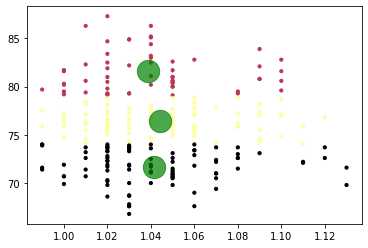

In [33]:
plt.scatter(ms_hrv[:, 0], ms_hrv[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

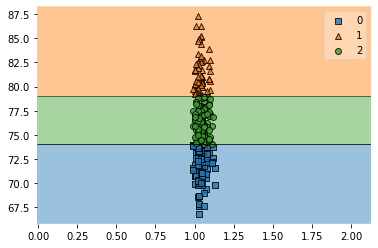

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(ms_hrv, y_kmeans, clf=kmeans);

In [35]:
kmeans.inertia_

719.088179994093

In [36]:
sse_ = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k).fit(ms_hrv)
    sse_.append([k, kmeans.inertia_])

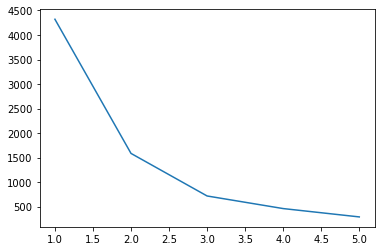

In [37]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);